<a href="https://colab.research.google.com/github/manjulamishra/DS-Sprint-02-Storytelling-With-Data/blob/master/week2_4_LS_DS_124_Sequence_your_narrative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Sequence your narrative

Create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv
-https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv
- https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv

### Stretch goals
- [ipywidgets](https://github.com/jupyter-widgets/ipywidgets)
- [Matplotlib animation](https://matplotlib.org/examples/animation/index.html)
- [Connected scatter plots](http://www.thefunctionalart.com/2012/09/in-praise-of-connected-scatter-plots.html)
- [Idyll markup language](https://idyll-lang.org/) for "scrollytelling"

##The goal: recreate Hans Rossling's Graph with 6 vars in 2D space


###The variables we notice in the video are:


*   Income --> represented on x axis
*   Lifespan --> on Y axis
*   Region --> mapped to color
*   Population --> as size
*   Year --> animation frame (alternative: small multiple)
*   Country --> annotation
Qualitative --> Verbal
* Editorial/contextual explanation --> audio narration (alternative text)


Year	Country	Region	Income	Lifespan	Population
1818	USA	Americas	###	##	#
1918	USA	Americas	####	###	##
2018	USA	Americas	#####	###	###
1818	China	Asia	#	#	#
1918	China	Asia	##	##	###
2018	China	Asia	###	###	#####


Variables --> Visual Encodings
- Income --> x
- Lifespan --> y
- Region --> color
- Population --> size
- Year --> animation frame (alternative: small multiple)
- Country --> annotation

Qualitative --> Verbal
- Editorial / contextual explanation --> audio narration (alternative: text)


| Year | Country | Region   | Income | Lifespan | Population |
|------|---------|----------|--------|----------|------------|
| 1818 | USA     | Americas | ###    | ##       | #          |
| 1918 | USA     | Americas | ####   | ###      | ##         |
| 2018 | USA     | Americas | #####  | ###      | ###        |
| 1818 | China   | Asia     | #      | #        | #          |
| 1918 | China   | Asia     | ##     | ##       | ###        |
| 2018 | China   | Asia     | ###    | ###      | #####      |


by Ryan Herr

###Ugrading Seaborn again
in colab, go to **Restart Runtime** after running the pip command


In [120]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [121]:
#restart Runtime
import seaborn as sns
sns.__version__

'0.9.0'

##Import more python libs

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

###Load datafiles and have a look at the data inside

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

####We can check shape of different dataframes together 

In [128]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((44268, 3), (44370, 3), (51939, 3), (273, 33), (590, 16))

####lets check first few rows of all the files

In [129]:
income.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted
0,abw,1800,833
1,abw,1801,833
2,abw,1802,833
3,abw,1803,833
4,abw,1804,833


In [130]:
lifespan.head()

,geo,time,life_expectancy_years
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [131]:
population.head()

,geo,time,population_total
0,abw,1800,19286
1,abw,1801,19286
2,abw,1802,19286
3,abw,1803,19286
4,abw,1804,19286


####when datafile has many columns then it's a good idea to see them all

In [132]:
pd.options.display.max_columns = None
entities.head()

,country,alt_5,alternative_1,alternative_2,alternative_3,alternative_4_cdiac,arb1,arb2,arb3,arb4,arb5,arb6,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,world_4region,world_6region
0,abkh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,NaN,NaN,NaN,NaN,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,NaN,Islamic Republic of Afghanistan,NaN,NaN,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,NaN,NaN,NaN,NaN,Angola,NaN,NaN,NaN,NaN,NaN,NaN,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [134]:
concepts.head()

,concept,color,concept_type,description,description_long,domain,drill_up,indicator_url,name,name_catalog,name_short,scales,source,source_long,source_url,tags
0,adults_with_hiv_percent_age_15_49,NaN,measure,The estimated percentage of adults aged 15 to ...,NaN,NaN,NaN,NaN,"Adults with HIV (%, age 15-49)","Adults with HIV (%, age 15-49)",Adults with HIV,"[""log"", ""linear""]",NaN,NaN,http://www.gapminder.org/gapminder-world/docum...,hiv
1,age_at_1st_marriage_women,NaN,measure,"The mean age, in years, of first marriage for ...",NaN,NaN,NaN,NaN,Age at 1st marriage (women),Age at 1st marriage (women),Age at 1st marriage,"[""linear"", ""log""]",NaN,NaN,http://spreadsheets.google.com/pub?key=t4eF8H_...,population
2,aged_15_24_employment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 employment rate (%),Aged 15-24,Employment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,employment_rate
3,aged_15_24_unemployment_rate_percent,NaN,measure,"Percentage of total population, age group 15-2...",NaN,NaN,NaN,NaN,Aged 15-24 unemployment rate (%),Aged 15-24,Unemployment rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,unemployment
4,aged_15_64_labour_force_participation_rate_per...,NaN,measure,"For age group 15-64, percentage of all labour ...",NaN,NaN,NaN,NaN,Aged 15-64 labour force participation rate (%),Aged 15-64,Labour force participation rate (%),"[""linear"", ""log""]",NaN,NaN,http://ilo.org/legacy/english/global-reports/k...,labour_force_participation


###Merging data
####Very useful cheatsheet; https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf

In [0]:
#either way to see the documentation
#help(pd.merge)
pd.merge?

In [0]:
#first join income dataframe with lifespan dataframe, it added the unique column 
df = pd.merge(income, lifespan)

In [136]:
income.shape, lifespan.shape, df.shape

((44268, 3), (44370, 3), (41790, 4))

In [137]:
#Lets check the first few rows of df
df.head() #the merge worked and it added the life expectancy column in income

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years
0,abw,1800,833,34.42
1,abw,1801,833,34.42
2,abw,1802,833,34.42
3,abw,1803,833,34.42
4,abw,1804,833,34.42


In [0]:
# also have to add population 
df = pd.merge(df, population)

In [57]:
df.shape

(41790, 5)

####there is some problem with the entities file. I'm uplaoding it here again

In [0]:
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
#this should work too but there is some problem running this code on multiple attributes
entities =[entities.landlocked =='coastline']

In [143]:
entities[entities.country=='abw'].T #.T is to scroll vertically

,1
country,abw
alt_5,NaN
alternative_1,NaN
alternative_2,NaN
alternative_3,NaN
alternative_4_cdiac,Aruba
arb1,NaN
arb2,NaN
arb3,NaN
arb4,NaN


####Value_count: Returns object containing counts of unique values.

In [144]:
#chekcing the unique values for world_4 region attribute
entities.world_4region.value_counts() 

asia        80
europe      73
africa      61
americas    57
Name: world_4region, dtype: int64

In [145]:
#chekcing the unique values for world_6 region attribute
entities.world_6region.value_counts()

europe_central_asia         77
america                     53
sub_saharan_africa          53
east_asia_pacific           46
middle_east_north_africa    23
south_asia                   8
Name: world_6region, dtype: int64

In [0]:
#assigning these attributes from entitites df to a var named variables
variables = ['country', 'name', 'world_6region']


In [147]:
entities[variables].head()

,country,name,world_6region
0,abkh,Abkhazia,europe_central_asia
1,abw,Aruba,america
2,afg,Afghanistan,south_asia
3,ago,Angola,sub_saharan_africa
4,aia,Anguilla,america


####let's check the df (merged file with income+lifespan+population)

In [148]:
df.head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total
0,abw,1800,833,34.42,19286
1,abw,1801,833,34.42,19286
2,abw,1802,833,34.42,19286
3,abw,1803,833,34.42,19286
4,abw,1804,833,34.42,19286


###Now, we are going to merge the variables we selected from entities dataframe into income (merged df) to make a workable dataframe
pd.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)

In [149]:
#we are merging entities[variable] to main df we merged already
pd.merge(df, entities[variables], 
         how ='inner', left_on='geo', right_on='country').head()

,geo,time,income_per_person_gdppercapita_ppp_inflation_adjusted,life_expectancy_years,population_total,country,name,world_6region
0,abw,1800,833,34.42,19286,abw,Aruba,america
1,abw,1801,833,34.42,19286,abw,Aruba,america
2,abw,1802,833,34.42,19286,abw,Aruba,america
3,abw,1803,833,34.42,19286,abw,Aruba,america
4,abw,1804,833,34.42,19286,abw,Aruba,america


### Dropping duplicate columns (geo is abb for country). These two columns don't have any unique info

In [150]:
#lets assign our merged file df
df = pd.merge(df, entities[variables], 
              how='inner', left_on='geo', right_on='country')
#drop duplicate columns
df.drop(columns=['geo', 'country'], inplace=True)

#lets rename our columns something simpler
df.rename(columns={
    'time': 'year', 
    'income_per_person_gdppercapita_ppp_inflation_adjusted': 'income', 
    'life_expectancy_years': 'lifespan', 
    'population_total': 'population', 
    'name': 'country', 
    'world_6region': 'region'
}, inplace=True)

df.shape

(41790, 6)

In [151]:
df.shape

(41790, 6)

##Explore data

In [152]:
df.describe()

,year,income,lifespan,population
count,41790.000000,41790.000000,41790.000000,4.179000e+04
mean,1909.357406,4778.593683,43.267181,1.332550e+07
std,63.322969,10502.602580,16.394240,6.502349e+07
min,1800.000000,247.000000,1.000000,2.128000e+03
25%,1854.000000,884.000000,31.200000,3.760282e+05
50%,1909.000000,1449.000000,35.500000,1.915244e+06
75%,1964.000000,3536.750000,56.340000,6.260147e+06
max,2018.000000,177522.000000,84.170000,1.415046e+09


In [153]:
df.describe(exclude=[np.number])

,country,region
count,41790,41790
unique,194,6
top,Puerto Rico,europe_central_asia
freq,219,10991


In [154]:
#to check if there are any duplicate countries
df.country.unique()

array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire",
       'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia',
       'Comoros', 'Cape Verde', 'Costa Rica', 'Cuba', 'Cyprus',
       'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea',
       'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France',
       'Micronesia, Fed. Sts.', 'Gabon', 'United Kingdom', 'Georgia',
       'Ghana', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatoria

###checking for USA
in df checking for USA and then inside usa checking attributes for those particualr years

In [155]:
usa = df[df.country=='United States']
usa[usa.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
39399,1818,2258,39.41,9879049,United States,america
39499,1918,9371,47.18,106721812,United States,america
39599,2018,54898,79.14,326766748,United States,america


###checking for China
in df checking for USA and then inside usa checking attributes for those particualr years

In [156]:
china = df[df.country=='China']
china[china.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
7120,1818,985,32.00,374161494,China,east_asia_pacific
7220,1918,989,22.13,462444535,China,east_asia_pacific
7320,2018,16018,76.92,1415045928,China,east_asia_pacific


In [157]:
india = df[df.country=='India']
india[india.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
17235,1818,1050,25.44,175235440,India,south_asia
17335,1918,1157,8.12,264771644,India,south_asia
17435,2018,6890,69.10,1354051854,India,south_asia


In [158]:
singapore = df[df.country=='Singapore']
singapore[singapore.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
32831,1818,1024,29.10,31136,Singapore,east_asia_pacific
32931,1918,2423,21.88,369665,Singapore,east_asia_pacific
33031,2018,83888,84.03,5791901,Singapore,east_asia_pacific


In [159]:
saudi = df[df.country=='Saudi Arabia']
saudi[saudi.year.isin([1818, 1918, 2018])]

,year,income,lifespan,population,country,region
32174,1818,856,32.10,2099055,Saudi Arabia,middle_east_north_africa
32274,1918,1030,29.48,2714784,Saudi Arabia,middle_east_north_africa
32374,2018,50114,77.64,33554343,Saudi Arabia,middle_east_north_africa


##Plot visualization

In [160]:
now = df[df.year==2018]
print(now.shape)
now.sample(15)

(188, 6)


,year,income,lifespan,population,country,region
22691,2018,30368,75.31,2876475,Lithuania,europe_central_asia
21596,2018,801,65.43,4853516,Liberia,sub_saharan_africa
28870,2018,38900,78.06,4829946,Oman,middle_east_north_africa
2236,2018,44645,81.84,8751820,Austria,europe_central_asia
25804,2018,12100,68.69,3121772,Mongolia,east_asia_pacific
12404,2018,40290,82.06,5542517,Finland,europe_central_asia
7101,2018,23366,80.66,18197209,Chile,america
1798,2018,21035,77.60,103050,Antigua and Barbuda,america
16997,2018,26936,75.90,9688847,Hungary,europe_central_asia
23567,2018,7719,75.46,36191805,Morocco,middle_east_north_africa


###Plotting in seaborn

In [0]:
sns.relplot?

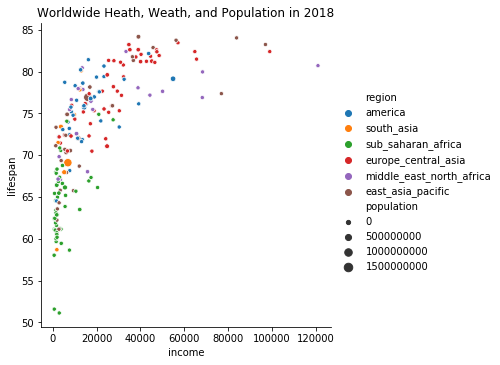

In [175]:
sns.relplot(x= 'income', y = 'lifespan', hue ='region', size ='population', data= now);
plt.title('Worldwide Heath, Weath, and Population in 2018');


##Analyzing Outliers
####we can create constraints and analyze the data

In [162]:
now[now.income>80000]

,year,income,lifespan,population,country,region
22910,2018,99034,82.39,590321,Luxembourg,europe_central_asia
23348,2018,97057,83.24,632418,"Macao, China",east_asia_pacific
31498,2018,121033,80.71,2694849,Qatar,middle_east_north_africa
33031,2018,83888,84.03,5791901,Singapore,east_asia_pacific


In [164]:
entities[entities.name=='Qatar'].T

,200
country,qat
alt_5,NaN
alternative_1,NaN
alternative_2,NaN
alternative_3,NaN
alternative_4_cdiac,Qatar
arb1,NaN
arb2,NaN
arb3,NaN
arb4,NaN


###Let's get the dataframes out for the countries we are interested in. 
####for Qatar, India and singapore, we are abstracting the df from main df, also, income and the lifespan

In [0]:
qatar = now[now.country=='Qatar']
qatar_income = qatar.income.values[0]
qatar_lifespan = qatar.lifespan.values[0]

In [0]:
india = now[now.country=='India']
india_income = india.income.values[0]
india_lifespan = india.lifespan.values[0]

In [0]:
singapore = now[now.country=='Singapore']
singapore_income = singapore.income.values[0]
singapore_lifespan = singapore.lifespan.values[0]

In [0]:
usa = now[now.country=='United States']
usa_income = usa.income.values[0]
usa_lifespan = usa.lifespan.values[0]

In [0]:
china = now[now.country=='China']
china_income = china.income.values[0]
china_lifespan = china.lifespan.values[0]

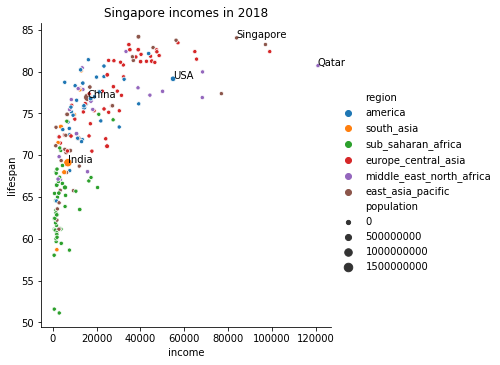

In [195]:
#plotting the data from now dataframe
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now)

plt.text(x=singapore_income, y=singapore_lifespan, s='Singapore')
plt.text(x=qatar_income, y=qatar_lifespan, s='Qatar')
plt.text(x=india_income, y=india_lifespan, s='India')
plt.text(x=usa_income, y=usa_lifespan, s ='USA')
plt.text(x=china_income, y=china_lifespan, s ='China')

plt.title('Singapore incomes in 2018' );

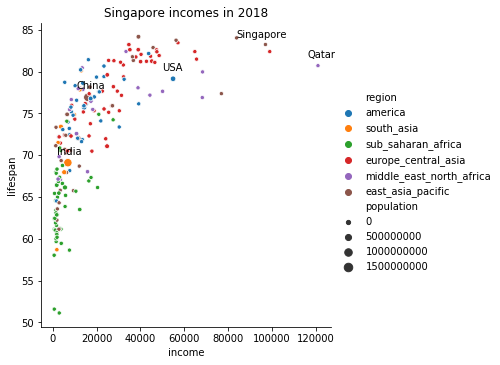

In [204]:
#plotting the data from now dataframe
sns.relplot(x='income', y='lifespan', hue='region', size='population', data=now)

#-5000, +1 is to adjust the text on/around the dotes
plt.text(x=singapore_income, y=singapore_lifespan, s='Singapore')
plt.text(x=qatar_income-5000, y=qatar_lifespan+1, s='Qatar')
plt.text(x=india_income-5000, y=india_lifespan+1, s='India')
plt.text(x=usa_income-5000, y=usa_lifespan+1, s ='USA')
plt.text(x=china_income-5000, y=china_lifespan+1, s ='China')

plt.title('Singapore incomes in 2018' );

In [0]:
plt.title?

##Plotting Mulitple Years

In [0]:
#now = df[df.year ==2018]
years = [1818, 1918, 2018]
centuries = df[df.year.isin(years)]

###The x axis is streched, what if we take log of income
####we are using centuries dataframe

###Result is: three different graphs for three different years and a log scaled version of income axis x

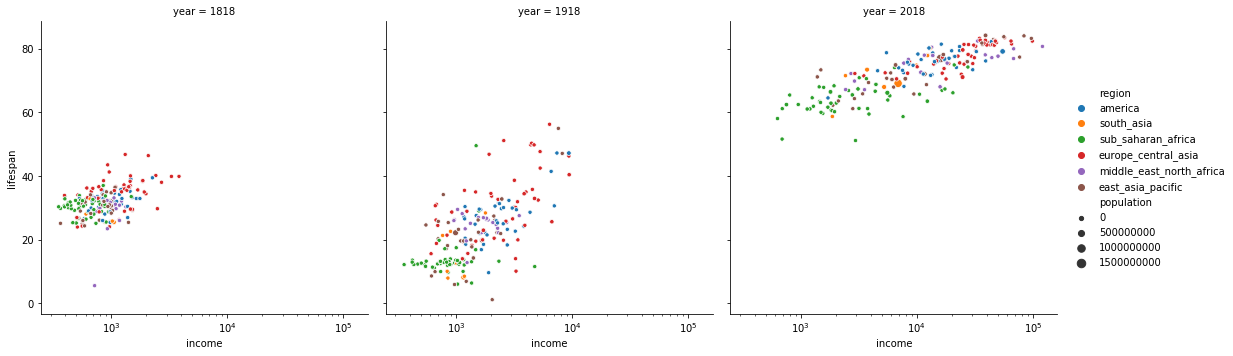

In [197]:
sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            col='year', data=centuries)

plt.xscale('log');


##Consistent Countries per year?
Using groupby

In [198]:
centuries.groupby('year').country.count()

year
1818    190
1918    190
2018    188
Name: country, dtype: int64

In [202]:
#countries who appeared for less than the three years we mentioned, 1818, 1918, 2018
years_per_country = centuries.groupby('country').year.count()
years_per_country[years_per_country<3]

country
Greenland    2
Taiwan       2
Name: year, dtype: int64

##Pointing out a story

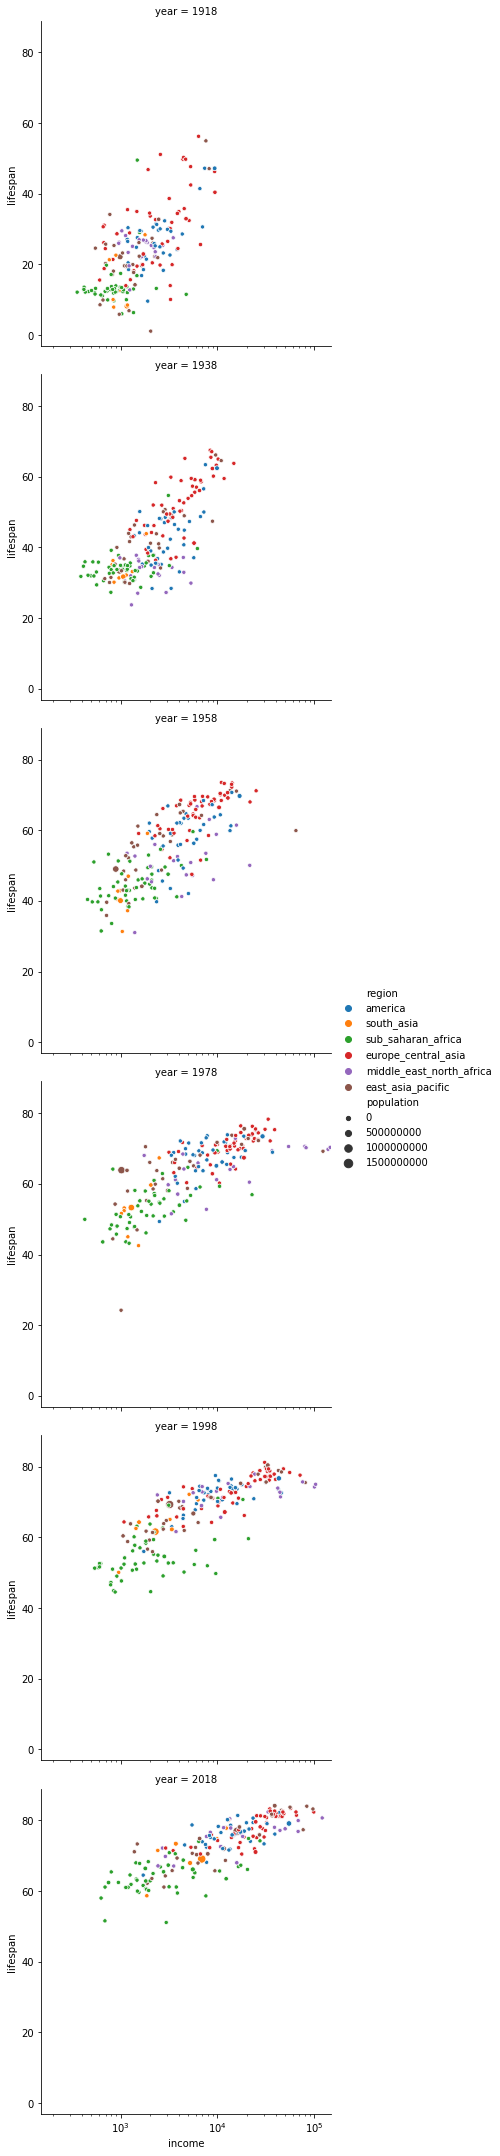

In [203]:
#lets plot graphs for more years
years = [1918,  1938, 1958, 1978, 1998, 2018]

#using subset function
subset = df[df.year.isin(years)]

#seaborn relationship plot
sns.relplot(x='income', y='lifespan', hue='region', size='population', 
            row='year', data=subset)

#scale the x asix
plt.xscale('log')
plt.xlim(150, 150000);